# Deep Learning (RNA)

**-> s'inspire du fonctionnement du système nerveux humain**

- plus les réseaux sont profonds plus on peut effectuer des taches complexes
- traite des millions de données, Big Data
- processeurs graphiques GPU -> optimiser le temps de traitement

# Perceptron (modèle linéaire) / Régression Logistique
-> modèle de classification binaire, séparer 2 classes de points linéairement séparable
-> calculer la **frontière de décisision(ensemble des points tq z=0**

Il contient:

- **fonction d'activation(sigmoide):** retourne 0 ou 1 au fur et à mesure que l'on s'éloigne de la frontière de décision = a(z) = 1/(1+e^(-z)) -> proba suivant une loi de bernouilli, P(z) = p^z x (1-p)^z 
- **fonction d'agrégation:** = somme(wixi)+biais

- **fonction cout(Loss Function = Log Loss):** log vraisemblance. Vraisemblance Likelihood(plausibilité du modèle au regard des données) = produit des probas

- **Descente de gradient(dérivée):** ajuster wi et biais de façon à minimiser la fonction cout


Si problème trop complexe:
- améliorer le modèle en rajoutant des variables pour développer un modèle polynomiale(Feature Engineering) -> ML
- rajouter des couches -> obtenir un modèle non linéaire

# Vectoriasation des équations

-> mettre les données dans des vecteurs, matrices ou tableaux à n dimensions -> code plus simple, exécution plus rapide

m = taille des données
n = nombre de variables = 2

- fonction d'agrégaion z = w1.x1 + w2.x2 + b 
       -> Z = X.W + b avec X = M(m,n) et W = M(n,1)


- fonction d'activation a = 1 / (1 + e^(-z))
        -> A = sigma(Z)  avec A = M(m,1)

- log Loss
        -> L = -1/m . sum(y.log(A) + (1-y).log(1-A))

- Descente de Gradient
        -> W = W - alpha.jacobien avec W = M(n,1) et jacobien = dérivé parielle de W 
        -> b = b - alpha.d(L)/d(b)

        -> d(L)/d(W) = 1/m . Xt.(A-y) avec Xt = transposée de X = M(n,m)
        -> d(L)/d(b) = 1/m .(A-y) 

## Algorithme de la Descente de Gradient

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from tqdm import tqdm

dimension de X (100, 2)
dimension de y (100, 1)


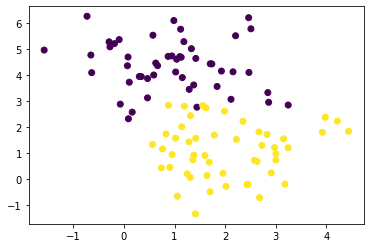

In [6]:
# 100 lignes et 2 variables
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0) 
y = y.reshape(y.shape[0], 1)

print('dimension de X', X.shape)
print('dimension de y', y.shape)

plt.scatter(X[:,0], X[:,1], c=y)

In [7]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return W,b

(2, 1)
(1,)


In [19]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [36]:
def log_loss(A, y):
    epsilon = 1e-15
    return 1 / len(y) * np.sum(-y * np.log(A+epsilon) - (1-y) * np.log(1-A+epsilon))

In [17]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A-y)
    db = 1 / len(y) * np.sum(A-y)
    return dW, db

In [16]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return W, b

In [59]:
def predict(X, W, b):
    A = model(X, W, b)
    #print(f'activation associée: {A}')
    return A >= 0.5

In [6]:
def artificial_neuron(X_train, y_train, X_test, y_test, learning_rate=0.1, n_iter=100):
    W, b = initialisation(X_train)
    
    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []
    
    for i in tqdm(range(n_iter)):
        # activations
        A = model(X_train, W, b)
        
        if i%10==0: # juste pour réduire le temps
            # Train
            train_loss.append(log_loss(A, y_train)) 
            y_pred = predict(X_train, W, b) 
            train_acc.append(accuracy_score(y_train, y_pred))
            
            
            # Test
            A_test = model(X_test, W, b)
            test_loss.append(log_loss(A_test, y_test)) 
            y_pred = predict(X_test, W, b)
            test_acc.append(accuracy_score(y_test, y_pred))
        
        # mise à jour
        dW, db = gradients(A, X_train, y_train)
        W, b = update(dW, db, W, b, learning_rate)
        
        
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    plt.plot(train_loss, label='train loss')
    plt.plot(test_loss, label='test loss')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(train_acc, label='train accuracy')
    plt.plot(test_acc, label='test accuracy')
    plt.legend()
    plt.show()
    
    return W, b

# Dog vs Cat with Computer Vision

In [38]:
from utilities import *

In [39]:
X_train, y_train, X_test, y_test = load_data()

In [40]:
print(X_train.shape) # 1000 photos, 64pixels x 64pixels
print(y_train.shape) # 0=chat, 1=chien
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500], dtype=int64))


In [41]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100], dtype=int64))


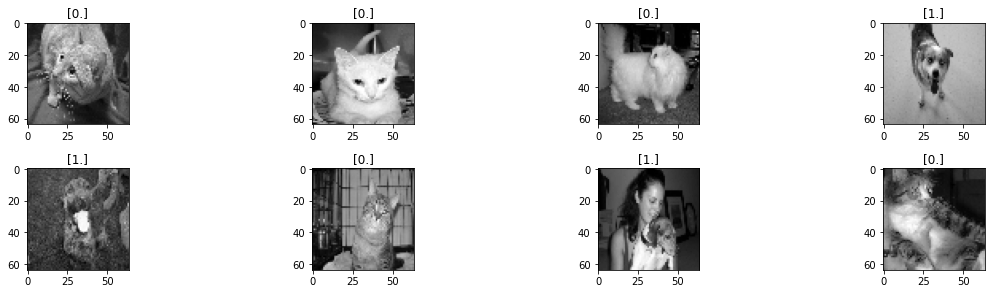

In [82]:
# afficher les 10 premières photos
plt.figure(figsize=(16,8))
for i in range(1,9):
    plt.subplot(4,4, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

## Entrainement, Normalisation MinMax et Aplatissement des images avec un Perceptron

In [114]:
X_train_reshape = X_train.reshape(X_train.shape[0], -1) / X_train.max()
X_test_reshape = X_test.reshape(X_test.shape[0], -1) / X_train.max()

100%|██████████| 1000/1000 [00:59<00:00, 16.90it/s]


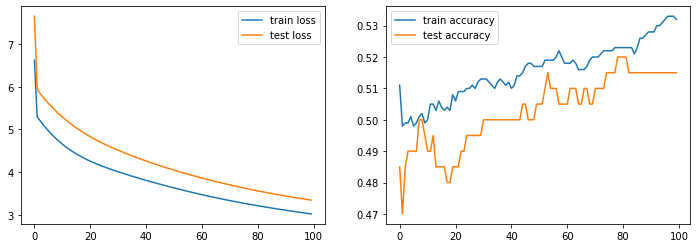

In [121]:
W, b = artificial_neuron(X_train_reshape, y_train, X_test_reshape, y_test, learning_rate=0.01, n_iter=1000)

## Avec un Réseau de Neurones

In [42]:
y_train, y_test = y_train.T, y_test.T
X_train, X_test = X_train.T, X_test.T

X_train_reshape = X_train.reshape(-1, X_train.shape[-1]) / X_train.max()
X_test_reshape = X_test.reshape(-1, X_test.shape[-1]) / X_train.max()

m_train, m_test = 300, 80
X_train_reshape, X_test_reshape = X_train_reshape[:, :m_train], X_test_reshape[:, :m_test]
y_train, y_test = y_train[:, :m_train], y_test[:, :m_test]

print('X_train_reshape :', X_train_reshape.shape)
print('X_test_reshape :', X_test_reshape.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)

X_train_reshape : (4096, 300)
X_test_reshape : (4096, 80)
y_train : (1, 300)
y_test : (1, 80)


100%|██████████| 8000/8000 [17:06<00:00,  7.79it/s] 


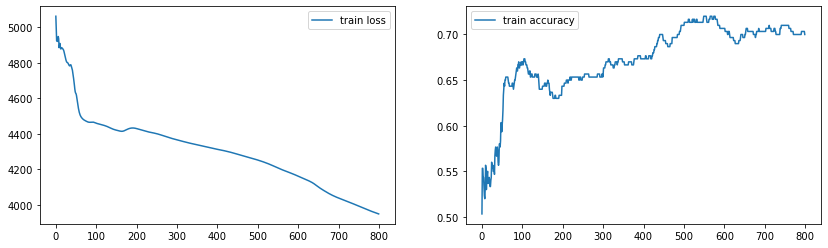

In [43]:
parametres = neural_network(X_train_reshape, y_train, n1=32, learning_rate=0.01, n_iter=8000)

# Réseaux de Neurones à 2 couches

In [22]:
def initialisation(n0, n1, n2):
    W1 = np.random.randn(n1, n0)
    b1 = np.random.randn(n1, 1)
    
    W2 = np.random.randn(n2, n1)
    b2 = np.random.randn(n2, 1)
    
    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }
    
    return parametres

In [23]:
def forward_propagation(X, parametres):
    
    W1, b1 = parametres['W1'], parametres['b1']
    W2, b2 = parametres['W2'], parametres['b2']
    
    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))
    
    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))
    
    activations = {
        'A1': A1,
        'A2': A2,
    }
    
    return activations

In [32]:
def back_propagation(X, y, activations, parametres):
    
    A1, A2 = activations['A1'], activations['A2']
    W2 = parametres['W2']
    
    m = y.shape[1]
    
    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    
    dZ1 = np.dot(W2.T, dZ2) * A1 
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    
    gradients = {
        'dW1': dW1,
        'db1': db1,
        'dW2': dW2,
        'db2': db2
    }
    
    return gradients

In [34]:
def update(gradients, parametres, learning_rate):
    
    W1, b1 = parametres['W1'], parametres['b1']
    W2, b2 = parametres['W2'], parametres['b2']
    
    dW1, db1 = gradients['dW1'], gradients['db1']
    dW2, db2 = gradients['dW2'], gradients['db2']
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
        
    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }
    
    return parametres

In [26]:
def predict(X, parametres):
    activations = forward_propagation(X, parametres)
    return activations['A2'] >= 0.5

In [27]:
def neural_network(X_train, y_train, n1, learning_rate=0.1, n_iter=100):
    
    # initialisation
    n0 = X_train.shape[0]
    n2 = y_train.shape[0]
    parametres = initialisation(n0, n1, n2)
    
    train_loss = []
    train_acc = []
    
    for i in tqdm(range(n_iter)):

        activations = forward_propagation(X_train, parametres)
        gradients = back_propagation(X_train, y_train, activations, parametres)
        parametres =  update(gradients, parametres, learning_rate)
        
        if i%10==0: 
            # Train
            train_loss.append(log_loss(y_train, activations['A2'])) 
            y_pred = predict(X_train, parametres) 
            current_acc = accuracy_score(y_train.flatten(), y_pred.flatten()) 
            train_acc.append(current_acc)
            
        
    plt.figure(figsize=(14,4))
    
    plt.subplot(1,2,1)
    plt.plot(train_loss, label='train loss')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(train_acc, label='train accuracy')
    plt.legend()
    plt.show()
    
    return parametres

In [8]:
from sklearn.datasets import make_circles

dimension de X (2, 100)
dimension de y (1, 100)


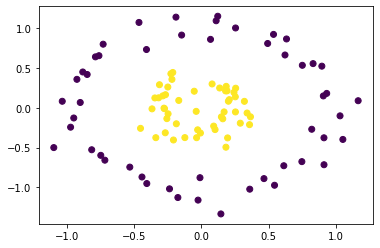

In [18]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1,y.shape[0]))

print('dimension de X', X.shape)
print('dimension de y', y.shape)

plt.scatter(X[0, :], X[1, :], c=y)

100%|██████████| 1000/1000 [00:01<00:00, 926.25it/s]


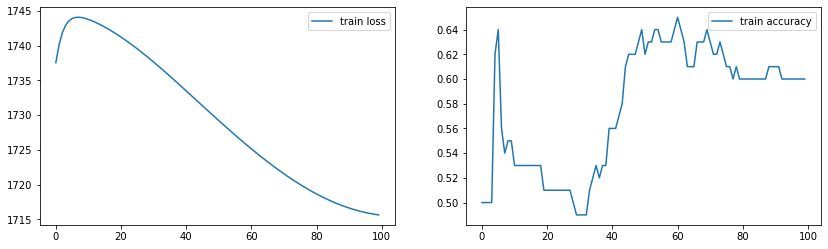

In [37]:
parametres = neural_network(X, y, n1=2, n_iter=1000, learning_rate=0.1)

# Réseaux de Neurones à 2 couches

In [50]:
def initialisation(dimensions):
    
    parametres = {}
    
    for c in range(1, len(dimensions)):
        parametres['W'+str(c)] = np.random.randn(dimensions[c], dimensions[c-1])
        parametres['b'+str(c)] = np.random.randn(dimensions[c], 1)
        
    return parametres

In [52]:
def forward_propagation(X, parametres):
    
    activations = {'A0': X}
    C = len(parametres) // 2
    
    for c in range(1, C+1):
        Z = parametres['W'+str(c)].dot(activations['A'+str(c-1)]) + parametres['b'+str(c)]
        activations['A'+str(c)] = 1 / (1+np.exp(-Z))
        
    return activations

In [56]:
def back_propagation(y, activations, parametres):
    
    m = y.shape[1]
    C = len(parametres) // 2
    
    dZ = activations['A'+str(C)] - y
    gradients = {}
    
    for c in reversed(range(1, C+1)):
        gradients['dW'+str(c)] = 1 / m * dZ.dot(activations['A'+str(c-1)].T)
        gradients['db'+str(c)] = 1 / m * np.sum(dZ, axis=1, keepdims=True)
        
        if c>1:
            dZ = np.dot(parametres['W'+str(c)].T, dZ) * activations['A'+str(c-1)] * (1 - activations['A'+str(c-1)])
        
    return gradients

In [58]:
def update(gradients, parametres, learning_rate):
    
    C = len(parametres) // 2

    for c in reversed(range(1, C+1)):
        parametres['W'+str(c)] = parametres['W'+str(c)] - learning_rate * gradients['dW'+str(c)]
        parametres['b'+str(c)] = parametres['b'+str(c)] - learning_rate * gradients['db'+str(c)]
    
    return parametres

In [70]:
def n_neural_network(X, y, hidden_layers=(32,32,32), learning_rate=0.1, n_iter=100):
    
    np.random.seed(0)
    
    # initialisation W, b
    dimensions = list(hidden_layers)
    dimensions.insert(0, X.shape[0])
    dimensions.append(y.shape[0])
    parametres = initialisation(dimensions)
    
    train_loss = []
    train_acc = []
    
    for i in tqdm(range(n_iter)):

        activations = forward_propagation(X, parametres)
        gradients = back_propagation(y, activations, parametres)
        parametres =  update(gradients, parametres, learning_rate)
        
        if i%10==0: 
            C = len(parametres) // 2
            train_loss.append(log_loss(y, activations['A'+str(C)])) 
            y_pred = predict(X, parametres) 
            current_acc = accuracy_score(y.flatten(), y_pred.flatten()) 
            train_acc.append(current_acc)
            
    # visualisation des résultats
    plt.figure(figsize=(14,4))

    plt.subplot(1,2,1)
    plt.plot(train_loss, label='train loss')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(train_acc, label='train accuracy')
    plt.legend()
    plt.show()
    
    return parametres

W1 (32, 2)
b1 (32, 1)
W2 (32, 32)
b2 (32, 1)
W3 (1, 32)
b3 (1, 1)
(2, 100)
A0 (2, 100)
A1 (32, 100)
A2 (32, 100)
A3 (1, 100)
(1, 100)
dW3 (1, 32)
db3 (1, 1)
dW2 (32, 32)
db2 (32, 1)
dW1 (32, 2)
db1 (32, 1)


100%|██████████| 1000/1000 [00:01<00:00, 777.01it/s]


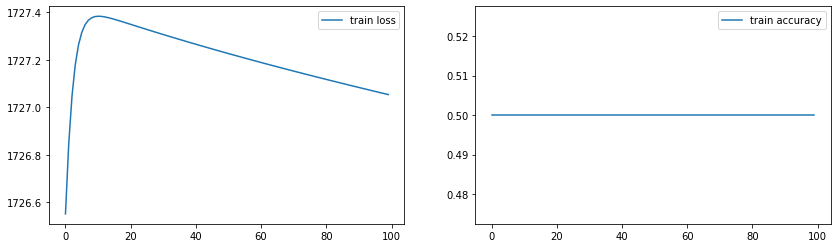

In [77]:
parametres = initialisation([2, 32, 32, 1])
for key, val in parametres.items():
    print(key, val.shape)
    
print(X.shape)  
activations = forward_propagation(X, parametres)
for key, val in activations.items():
    print(key, val.shape)
    
print(y.shape)  
grad = back_propagation(y, activations, parametres)
for key, val in grad.items():
    print(key, val.shape)

a = n_neural_network(X, y, (3,1), n_iter=1000, learning_rate=0.1)